## Praca domowa 4

#### Autor: Piotr Wilczyński

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
dfA = df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]
dfA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [4]:
dfB = df.loc[df.Year == 2010].groupby("Genre").Global_Sales.sum().sort_values(ascending = False)
dfB

Genre
Action          117.64
Misc             96.86
Sports           92.53
Shooter          77.41
Role-Playing     70.52
Racing           34.93
Platform         31.90
Simulation       21.99
Adventure        16.57
Fighting         14.89
Strategy         13.87
Puzzle           11.18
Name: Global_Sales, dtype: float64

odp: Najwięcej zarobiły gry akcji.

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [5]:
dfC = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].mean()
dfC = dfC.loc[dfC.JP_Sales > dfC.EU_Sales]["JP_Sales"].sort_values(ascending = False).to_frame().reset_index()
dfC.rename(columns = {"Genre" : "Typ Gry", "JP_Sales" : "Średnia sprzedaż w Japonii"})

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Oryginalny wykres

Oryginalny wykres pochodzi z artykułu na stronie bankier.pl dotyczącego analizy PKB Stanów Zjednoczonych: </br> </br>
![](https://galeria.bankier.pl/p/5/4/fbe782836a3e36-948-498-0-0-1636-860.webp) </br> </br>
Link do artykułu: https://www.bankier.pl/wiadomosc/PKB-USA-w-III-kwartale-2021-8213977.html

### Poprawiony wykres w ggplot2 </br></br>
![](https://raw.githubusercontent.com/wi1lku/hw4_git/master/ggplot2_chart_fixed.png)</br></br>
Link do pracy domowej, która poprawia powyższy wykres: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/TomczykMichal

### Wykres w Pythonie

In [6]:
# Biblioteki
import matplotlib.pyplot as plt
import seaborn as sns
# Import danych
df = pd.read_csv("https://raw.githubusercontent.com/wi1lku/hw4_git/master/HW4_data.csv",
                    delimiter = ",").reset_index(drop = True)
df.head()

,Unnamed: 0,Year,Quarter,Gdp
0,1,2000,Q1,1.5
1,2,2000,Q2,7.5
2,3,2000,Q3,0.5
3,4,2000,Q4,2.5
4,5,2001,Q1,-1.1


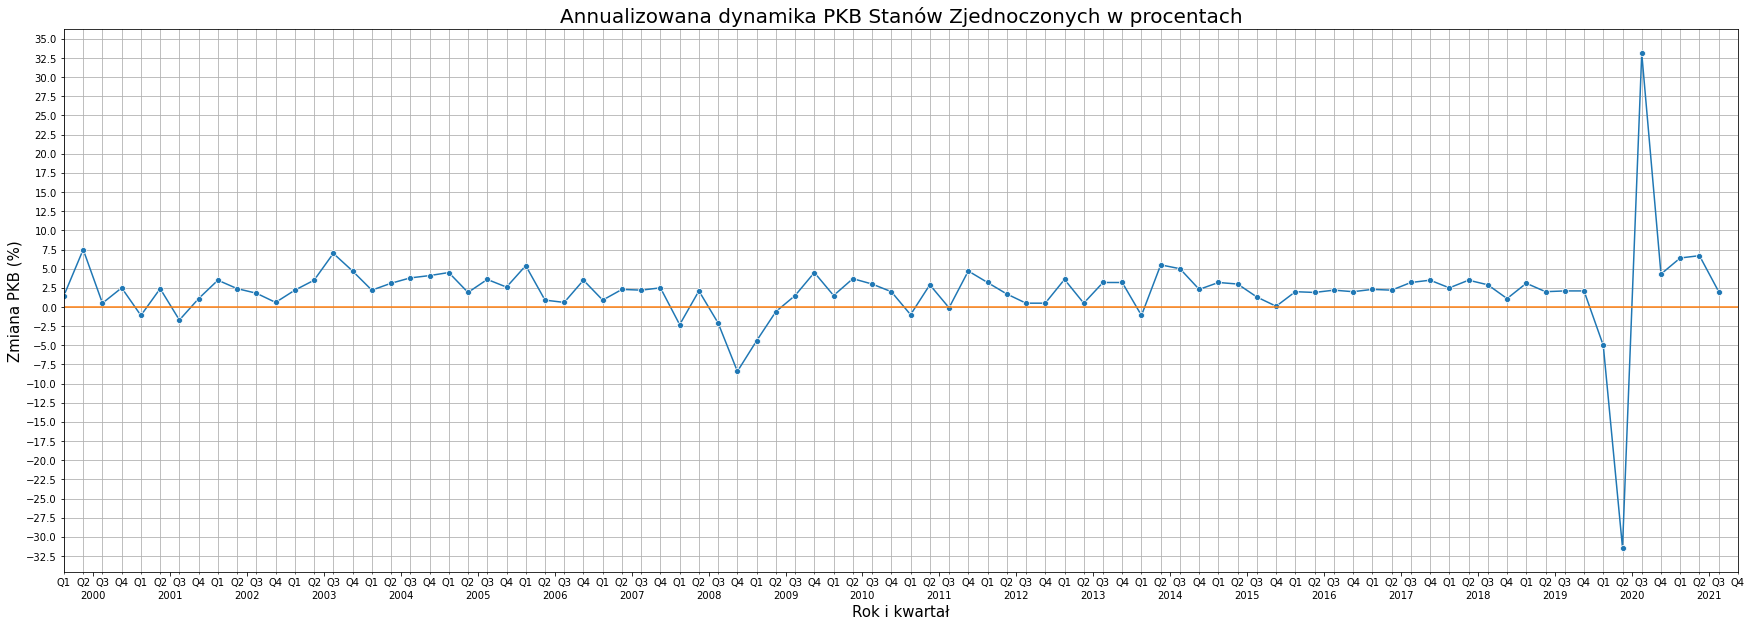

In [23]:
# Stworzenie wykresu
x_axis = [str(df["Year"][i]) + str(df["Quarter"][i]) for i in range(len(df["Year"]))]

plt.figure(figsize=(30, 10))
plt.xlim(0,86)
plt.grid(which = 'minor')
plt.grid(axis = 'y', which = 'major')

p = sns.lineplot(x = x_axis, y = df["Gdp"], marker = 'o')

p.set_yticks(np.arange(-65,75,5)/2);
p.set_xticks(np.arange(1,87,4)+0.5);
p.set_xticklabels(range(2000,2022));
p.set_xticks(range(0,88), minor = True);
p.set_xticklabels(np.tile(["Q1", "Q2", "Q3", "Q4"],22), minor = True);

plt.plot(np.zeros(88));

p.set_xlabel("Rok i kwartał", fontsize = 15)
p.set_ylabel("Zmiana PKB (%)", fontsize = 15)
p.set_title("Annualizowana dynamika PKB Stanów Zjednoczonych w procentach", fontsize = 20);
p.tick_params(axis = 'x', pad = 15)

### Czemy wykres w Pythonie jest lepszy?
Wykres stworzony w Pythonie jest lepszy z kilku powodów. Po pierwsze wszystkie powyższe wykresy wydają się mieć za zadanie pokazywać pewien trend w czasie. Taki trend łatwiej odczytywać z wykresu liniowego niż słupkowego. Słupki wprowadzają chaos. Na wykresie w Pythonie dodałem na osi x oznaczenia poszczególnych kwartałów. Dzięki temu można odczytać dokładnie która wartość odpowiada któremu kwartałowi. Na poprzednich wykresach nie było to tak oczywiste, a wręcz było mylące. Z oryginalnego wykresu można odczytać, że wartość 2% przypda na IV kwartwał 2021 zamiast na III. Dodatkowo ze względu na to, że wykres zawiara dane z długiego przedziału czasu, postanowiłem wydłużyć wykres, tak aby był bardziej czytelny. Zostawiłem gęstą siatkę, aby dalej można dokładniej odczytywać wartości. Dodatkowo postanowiłem narysować linię równoległą do osi x, aby móc łatwo stwierdzać, czy zmiana było dodatnia, czy ujemna.